# __Incremental Capstone - Week 10__

__Task: Build a Transfer Learning model to detect face masks on humans.__

__Task A:__
1. Load the Image Training and Test Datasets from the train and test
folder respectively. Each image is of shape 128 x 128 x 3
2. Load training dataset using Keras ImageDataGenerator with
validation_split=0.2
3. Load test dataset using Keras ImageDataGenerator
4. Build a Transfer Learning network using Keras with the following
layers
4.1.Load EfficientNetB0 as first layers using Keras API.
4.2.GLobalAveragePooling2D layer
4.3.Dropout(0.2)
4.4.Dense layer with 3 neurons and activation softmax
5. Compile the model with adam optimizer, categorical_crossentropy loss
and with metrics accuracy.
6. Train the model for 25 epochs with callbacks Reduce Learning Rate on
Plateau and early stopping while monitoring validation loss
7. Plot training and validation accuracy and loss against epochs.

__Task B:__
1. Load the Image Training and Test Datasets from the train and test folder
respectively. Each image is of shape 128 x 128 x 3
2. Load training dataset using Keras ImageDataGenerator with
validation_split=0.2
3. Load test dataset using Keras ImageDataGenerator
4. Build a Transfer Learning network using Keras with the following layers
4.1.Load ResNet50 as first layers using Keras API.
4.2.GLobalAveragePooling2D layer
4.3.Dropout(0.5)
4.4.Dense layer with 3 neurons and activation softmax
5. Compile the model with adam optimizer, categorical_crossentropy loss
and with metrics accuracy.

6. Train the model for 25 epochs with callbacks Reduce Learning Rate on
Plateau and early stopping while monitoring validation loss
7. Plot training and validation accuracy and loss against epochs

__Task C:__
1. Compare EfficientNetB0 and ResNet50 model performance and find the
best model
2. Using the best model predict on the test dataset and plot 10 images
from the test set along with its True Label and Predicted Label.


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

##Task A

__1. Load the Image Training and Test Datasets from the train and test
folder respectively. Each image is of shape 128 x 128 x 3__

In [2]:
# unzip -q /content/face_mask_detection_dataset-20240510T161332Z-001.zip

__2. Load training dataset using Keras ImageDataGenerator with
validation_split=0.2__

In [2]:
# Use horizontal_flip = True, vertical_flip = True, zoom_range = 0.1,
# shear_range = 0.1, width_shift_range = 0.2, height_shift_range = 0.2, rotation_range = 90
train_data_generator = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True,
                                                                    zoom_range=0.1, shear_range=0.1,
                                                                    width_shift_range=0.2, height_shift_range=0.2,
                                                                    rotation_range=90)
# Leave test_data_generator as is
test_data_generator = keras.preprocessing.image.ImageDataGenerator()

In [11]:
train_data = train_data_generator.flow_from_directory(directory='./data/facemasks/train')

Found 8082 images belonging to 3 classes.


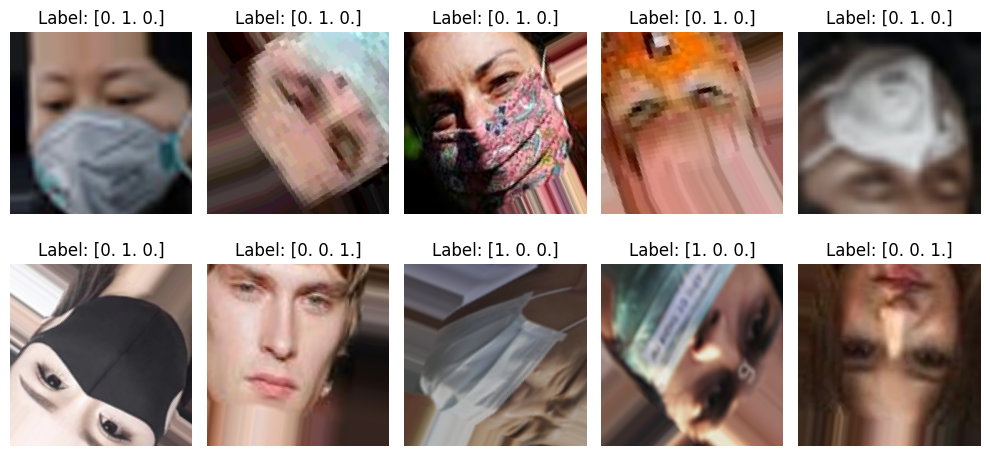

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
ax = ax.flatten()
for i in range(10):
  x_batch, y_batch = next(train_data)
  ax[i].imshow(x_batch[0]/255)
  ax[i].set_title(f"Label: {y_batch[0]}")
  ax[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import os
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})

for i, ax in enumerate(axes.flat):
  x, y = next(train_data)
  ax.imshow(x[0]/255)
  ax.set_title(f"Label: {y} " )
plt.show()

## Remark: The categories are one hot-encoded as:
- ## [1,0,0]: wears mask incorrectly
- ## [0,1,0]: wears mask corerctly
- ## [0,0,1]: does not wear mask

__3. Load test dataset using Keras ImageDataGenerator__

In [ ]:
test_data = test_data_generator.flow_from_directory("./face_mask_detection_dataset/test",target_size =(128,128), batch_size = 1,shuffle = True)

In [ ]:
import os
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})

for i, ax in enumerate(axes.flat):
  x, y = next(test_data)
  ax.imshow(x[0]/255)
  ax.set_title(f"Label: {y} " )
plt.show()

In [ ]:
labels = train_data.class_indices
labels

## ImageDataGenerator does not really assign values to an array, it just hold pointers. Because of that every learning step CPU perform reading operations. This slows learning speed. We will store data in numpy array type.

In [ ]:
def get_array_from_datagen(train_generator):
  x=[]
  y=[]
  train_generator.reset()
  for i in range (train_generator.__len__()):
    a,b=train_generator.next()
    x.append(a)
    y.append(b)
  x=np.array(x, dtype = np.float32)
  y=np.array(y, dtype = np.float32)
  print(x.shape)
  print(y.shape)
  return x,y

In [ ]:
X_train, y_train = get_array_from_datagen(train_data)
X_test, y_test = get_array_from_datagen(test_data)

In [ ]:
X_train = X_train.reshape(-1,128,128,3)
X_test = X_test.reshape(-1,128,128,3)
y_train = y_train.reshape(-1,3)
y_test = y_test.reshape(-1,3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

__4. Build a Transfer Learning network using Keras with the following
layers__
- Load EfficientNetB0 as first layers using Keras API.
- GLobalAveragePooling2D layer
- Dropout(0.2)
- Dense layer with 3 neurons and activation softmax

In [ ]:
input_shape = # CODE HERE
class_num = 3

In [ ]:
# Base model
base_model = # CODE HERE: import EfficientNetB0 with include_top=False

In [ ]:
base_model.summary()

In [ ]:
efficientnet_model = # CODE THE REQUESTED MODEL HERE

In [ ]:
efficientnet_model.summary()

__5. Compile the model with adam optimizer, categorical_crossentropy loss
and with metrics accuracy.__

In [ ]:
# Compile
# CODE HERE

__6. Train the model for 25 epochs with callbacks Reduce Learning Rate on
Plateau and early stopping while monitoring validation loss.__

In [ ]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau (
    monitor = "val_accuracy",
    factor = 0.5, # Factor by which the learning rate is reduced
    patience = 3,
    verbose = 0,
    in_lr = 0.00001) # Initial learning rate

In [ ]:
# Early stopping, patience = 5
early_stopping = # CODE HERE

In [ ]:
# Train the model using the test dataset as validation set, 6 epochs and callbacks = [learning_rate_reduction,early_stopping]
history = # CODE HERE

__7. Plot training and validation accuracy and loss against epochs.__

In [ ]:
import matplotlib.pyplot as plt
def plot_history (history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend (['train ','test'],loc='upper left')
  plt.show()
  # summarize history for Loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='upper left')
  plt.show()

In [ ]:
plot_history(history)

## Observations:
With this less number of epochs,
- Train loss decreases continuously
- Training accuracy increases smoothly.
- Validation loss also decreases continuously
- Validation accuracy also increases smoothly.

## Task B:

__1. Load the Image Training and Test Datasets from the train and test folder
respectively. Each image is of shape 128 x 128 x 3__

In [ ]:
# Already done

__2. Load training dataset using Keras ImageDataGenerator with
validation_split=0.2__

In [ ]:
# Alerady done

__3. Load test dataset using Keras ImageDataGenerator.__

In [ ]:
# Already done.

__4. Build a Transfer Learning network using Keras with the following layers__
- Load ResNet50 as first layers using Keras API.
- GLobalAveragePooling2D layer
- Dropout(0.5)
- Dense layer with 3 neurons and activation softmax

In [ ]:
# Base model
base_model = # CODE HERE: load ResNet50 with include_top=False

In [ ]:
base_model.summary()

In [ ]:
resnet_model = #CODE HERE

In [ ]:
resnet_model.summary()

__5. Compile the model with adam optimizer, categorical_crossentropy loss
and with metrics accuracy.__

In [ ]:
resnet_model.compile(
    optimizer="Adam",
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

__6. Train the model for 25 epochs with callbacks Reduce Learning Rate on
Plateau and early stopping while monitoring validation loss.__

In [ ]:
history = resnet_model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=6,
    callbacks = [learning_rate_reduction,early_stopping])

__7. Plot training and validation accuracy and loss against epochs.__

In [ ]:
plot_history(history)

## Observations:
With this less number of epochs,
- Train loss decreases continuously
- Training accuracy increases smoothly.
- Validation loss shows a general trend of decreasing
- Validation accuracy shows a general trend of increasing

## Task C:

__1. Compare EfficientNetB0 and ResNet50 model performance and find the
best model__

In [1]:
test_loss, test_accuracy = # CODE HERE: evaluate test set for the Efficientnet model
print(f"EfficientNetB0 Model Performance")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [1]:
test_loss, test_accuracy = # CODE HERE: evaluate test set for the resnet model
print(f"EfficientNetB0 Model Performance")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

## Observations:
- The accuracy level of EfficientNet is higher than Resnet50
- The training time of EfficientNet is lesser than Resnet50
- This is because the EfficientNet architecture is smaller than ResNet
- The prediction time of EfficientNet is also lesser than Resnet50
- Because of the EfficientNet model's wider layers architecture helped in achieving this

__2. Using the best model predict on the test dataset and plot 10 images
from the test set along with its True Label and Predicted Label.__

## The best Model is EfficientNet, we will check recall, precision and f1-score values

In [1]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis = 1),efficientnet_model.predict(X_test).argmax(axis = 1)))

## Observations:
__The classification report of EfficientNet says that:__
- Misclassifications is all the classes are very less
- mask_weared_incorrect class has got an F1 score of 0.99
- with_mask class has got an F1 score of 0.99
- without_mask class has got an F1 score of 1

__There are chances that model get confused with mask_weared_incorrect
and with_mask classes__

In [ ]:
import os
from shutil import copyfile
os.mkdir("./val_data 11")
os.mkdir("./val_data/with_mask")
os.mkdir("./val_data/mask_weared_incorrect")
os.mkdir("./val_data/without_mask")

In [ ]:
paths = []
names = []
k = 0
path = "./face_mask_detection_dataset/test/mask_weared_incorrect"
for i in os.listdir(path):
  paths.append(path + "/" + i)
  names.append("mask_weared_incorrect")
  copyfile(path + "/" + i, f"val_data/mask_weared_incorrect/{i}")
  k += 1
  if k == 8 :
    break

In [ ]:
k = 0
path = "./face_mask_detection_dataset/test/with_mask"
for i in os.listdir(path):
  paths.append(path + "/" + i)
  names.append("with_mask")
  copyfile(path + "/" + i, f"val_data/with_mask/{i}")
  k += 1
  if k == 8 :
    break

path = "./face_mask_detection_dataset/test/without_mask"

In [ ]:
k = 0
for i in os.listdir(path):
  paths.append ( path + "/" + i)
  names.append("without_mask")
  copyfile(path + "/" + i, f"val_data/without_mask/{i}")
  k += 1
  if k == 9 :
    break

In [ ]:
test_data_2 = test_data_generator.flow_from_directory("./val_data",target_size = (128,128), batch_size = 1,shuffle=False)

In [ ]:
print (labels)
labels_2 = {}
for k,v in labels.items():
  labels_2[v] = k

labels_2

In [ ]:
predictions = efficientnet_model.predict(test_data_2).argmax(axis = 1)
pred_label = []
for i in predictions:
  pred_label.append(labels_2[i])

pred_label

In [ ]:
import os
fig,axes = plt.subplots(nrows=5,ncols=5,figsize=(20,20),subplot_kw={'xticks':[],'yticks':[]})

for i, ax in enumerate (axes.flat):
  ax.imshow(plt. imread (pat hs[i]))
  ax.set_title (f"PREDICTION: {pred_label[i]}")
  ax.set_xlabel (f"DATA : {names [i]} " )

#plt.tight_Layout()
plt. show()

## Observations:<br>
The plot shows that EfficientNet is able to correctly identify people with masks,
without mask and with masks worn incorrectly.

# __Conclusion__
- EfficientNet outperformed Resnet Model in classifying people wearing mask or not
- EfficientNet gave an accuracy of 99%
- There are chances that models get confused with mask_weared_incorrect and
with_mask classes. This is even possible with humans as this is very subjective
- Though model is trained very less of epochs, this experiment proves the power of
Transfer Learning
- Because these models already know the features of a person, they are able to do
the job for this use case too
- Any image classification task, Transfer learning could be a good starting point
- EfficientNet, a lightweight convolutional neural network architecture achieving the
state-of-the-art accuracy with an order of magnitude fewer parameters, on both
ImageNet and five other commonly used transfer learning datasets.
- ResNet-50 model is a convolutional neural network (CNN) that is 50 layers deep. A
Residual Neural Network (ResNet) stacks residual blocks on top of each other to
form a network.
- EfficientNet is the latest architecture than ResNet